In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import tensorflow as tf
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [20]:
df = pd.read_csv("FuelConsumption.csv")

In [21]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [22]:
#Define the values
X_train = np.asanyarray(df[['ENGINESIZE']])
y_train = np.asanyarray(df[['CO2EMISSIONS']])

In [23]:
#Initialize variables with random guess and define the linear function
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * X_train + b

In [24]:
#Define the loss function for our regression
loss = tf.reduce_mean(tf.square(y - y_train))

In [25]:
#Define the optimizer method using gradient descent with a learning rate of 0.05
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [26]:
#Define the training method of our graphand use the .minimize()
train = optimizer.minimize(loss)

In [27]:
#Initialize the variable before executing the graph
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [28]:
#Start the optimization and run the graph
loss_values = []
train_data = []
for step in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if step % 5 == 0:
        print(step, loss_val, a_val, b_val)
        train_data.append([a_val, b_val])

0 26992.594 77.07106 46.110275
5 1891.7205 58.84462 47.59573
10 1762.7241 57.65104 53.019833
15 1653.5897 56.36652 58.023922
20 1559.0441 55.172844 62.68204
25 1477.1372 54.061794 67.01765
30 1406.179 53.027664 71.05309
35 1344.7057 52.065136 74.809135
40 1291.4506 51.169243 78.30512
45 1245.3145 50.33538 81.559074
50 1205.3451 49.55925 84.58775
55 1170.7189 48.83685 87.40674
60 1140.7214 48.164467 90.03055
65 1114.734 47.53864 92.472694
70 1092.2203 46.956135 94.74576
75 1072.7163 46.413967 96.86146
80 1055.8193 45.909332 98.83067
85 1041.1812 45.439632 100.66355
90 1028.4996 45.002453 102.36953
95 1017.5135 44.595547 103.95739


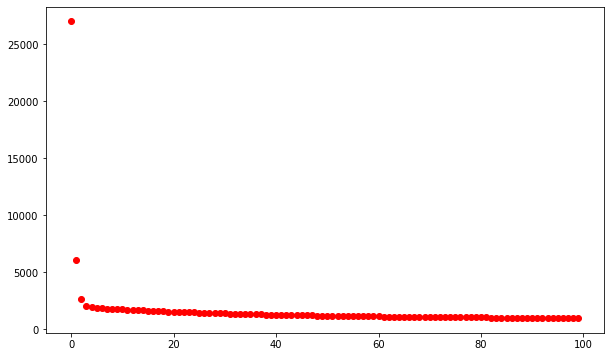

In [29]:
#Plot the loss values to show how it has changed during the training
plt.plot(loss_values, 'ro')

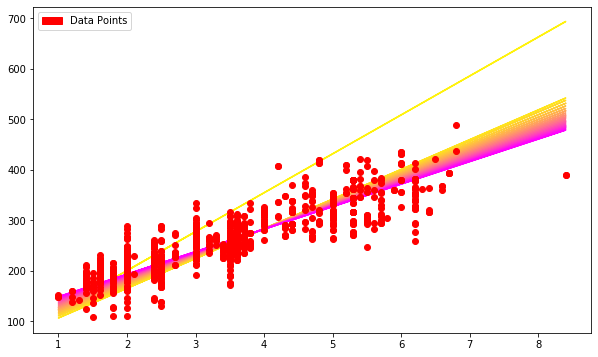

In [30]:
#Visualize how the coefficient and intercept of line has changed to fit the data
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(X_train)
    line = plt.plot(X_train, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(X_train, y_train, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()